# 1. Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Dell\Downloads\olist_translated_fixed.csv")
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,product_category,seller_city,seller_state,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,housewares,maua,SP,4.0,"I haven't tested the product yet, but it arriv...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,...,19.0,13.0,19.0,perfumery,belo horizonte,SP,4.0,Very good product.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,...,24.0,19.0,21.0,auto,guariba,SP,5.0,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,30.0,10.0,20.0,pet_shop,belo horizonte,MG,5.0,I was sad that you didn't answer me.,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,51.0,15.0,15.0,stationery,mogi das cruzes,SP,5.0,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [4]:
import numpy as np
from scipy.stats import kurtosis, skew
#Univariate SEDA

numerical_attributes = ['price', 'freight_value', 'review_score']
categorical_attributes = ['product_category', 'customer_state']


for att in numerical_attributes:
        # min,max,range
        min_value = round(df[att].min(), 2)
        max_value = round(df[att].max(), 2)
        range_value = round(max_value - min_value, 2)

        # Five number summary
        Q1 = round(df[att].quantile(0.25), 2)
        median = round(df[att].median(), 2)
        Q3 = round(df[att].quantile(0.75), 2)

        # Mean
        mean_value = round(df[att].mean(), 2)

        # IQR
        IQR = round(Q3 - Q1, 2)

        # Variance and standard deviation
        variance = round(df[att].var(), 2)
        std_dev = round(df[att].std(), 2)
        # MAD
        mad = round((df[att] - df[att].mean()).abs().mean(), 2)

        n = pd.to_numeric(df[att],errors='coerce').dropna()
        k = kurtosis(n, bias=True, fisher=True)
        s = skew(n, bias=True)
        k = round(k,2)
        s = round(s,2)

        print(att, ": ", "min = ", min_value, ", max = ", max_value, ", range = ", range_value,", Q1 = ", Q1, ", median = ", median, ", Q3 = ", Q3,
        ", mean = ", mean_value, ", IQR = ", IQR,", variance = ", variance, ", std_dev = ", std_dev,", MAD = ", mad, ", Kurtosis = ",k,", Skew = ",s)

        #Identifying outliers using IQR fences
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR
        outliers = df[(df[att] < lower_fence) | (df[att] > upper_fence)][att]
        print("Potential Outliers =", len(outliers), "(Values outside [", round(lower_fence, 2), ",", round(upper_fence, 2), "])")

#Frequency tables for categorical attributes
for att in categorical_attributes:
     freq_table = pd.crosstab(df[att], 'count')
     print("Frequency table for ", att)
     print(freq_table)
     print("\n")

#Finding mode for categorical attributes
for att in categorical_attributes:
    m = df[att].mode()
    print("Mode for ",att,": ",m)
    print("\n")
#Observations: We can see that the price is highly right skewed and the freight value also they are very heavy tailed, so most of the products and
#shipping costs are cheap.
#It seems that there is a quit large number of outliers we should deal with in next steps. It seems that bed path table category has trendy
#products so the company should manage its inventory according to that. It seems that most of the customers live in SP state so the company should try
#to put more adds in other states to maximize their profit.

price :  min =  0.85 , max =  6735.0 , range =  6734.15 , Q1 =  39.9 , median =  74.9 , Q3 =  134.9 , mean =  120.48 , IQR =  95.0 , variance =  33591.44 , std_dev =  183.28 , MAD =  89.91 , Kurtosis =  121.1 , Skew =  7.93
Potential Outliers = 8449 (Values outside [ -102.6 , 277.4 ])
freight_value :  min =  0.0 , max =  409.68 , range =  409.68 , Q1 =  13.08 , median =  16.26 , Q3 =  21.15 , mean =  19.98 , IQR =  8.07 , variance =  249.11 , std_dev =  15.78 , MAD =  8.64 , Kurtosis =  59.82 , Skew =  5.64
Potential Outliers = 12178 (Values outside [ 0.97 , 33.25 ])
review_score :  min =  1.0 , max =  5.0 , range =  4.0 , Q1 =  4.0 , median =  5.0 , Q3 =  5.0 , mean =  4.02 , IQR =  1.0 , variance =  1.96 , std_dev =  1.4 , MAD =  1.11 , Kurtosis =  0.13 , Skew =  -1.25
Potential Outliers = 18711 (Values outside [ 2.5 , 6.5 ])
Frequency table for  product_category
col_0                       count
product_category                 
agro_industry_and_commerce    212
air_conditioning    

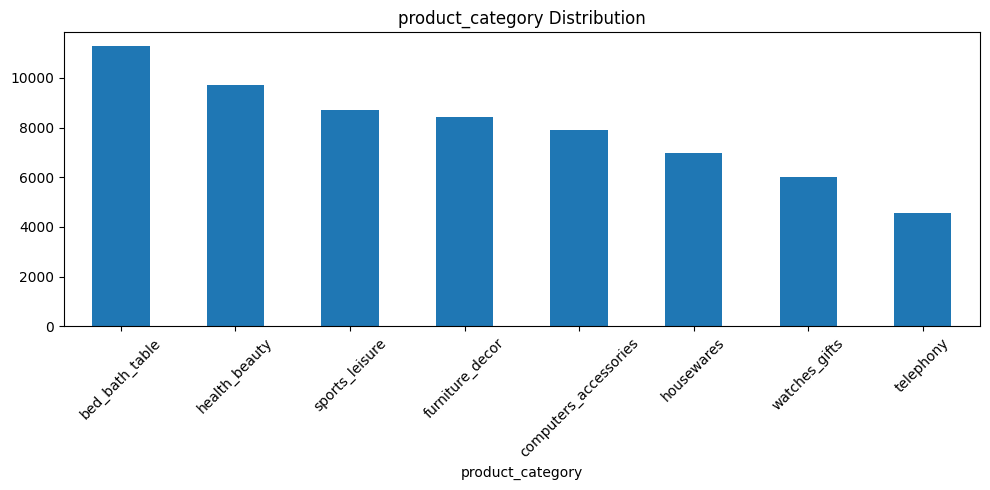

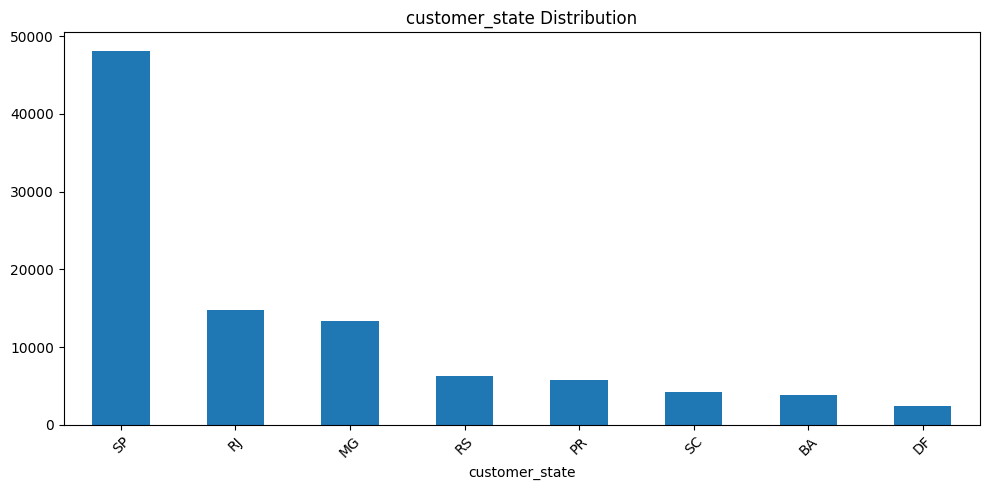

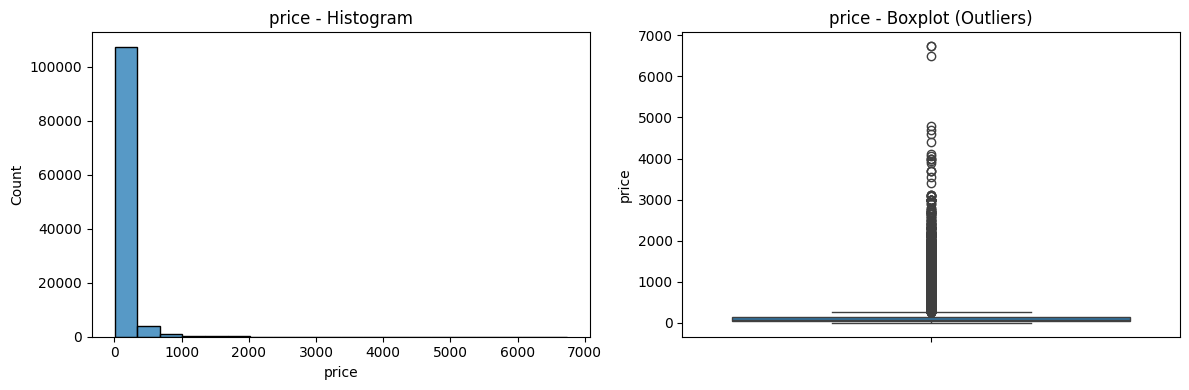

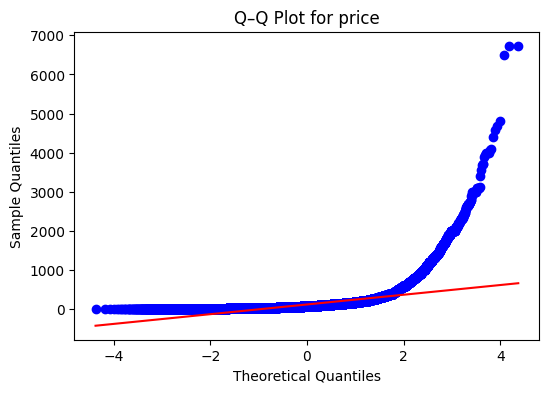

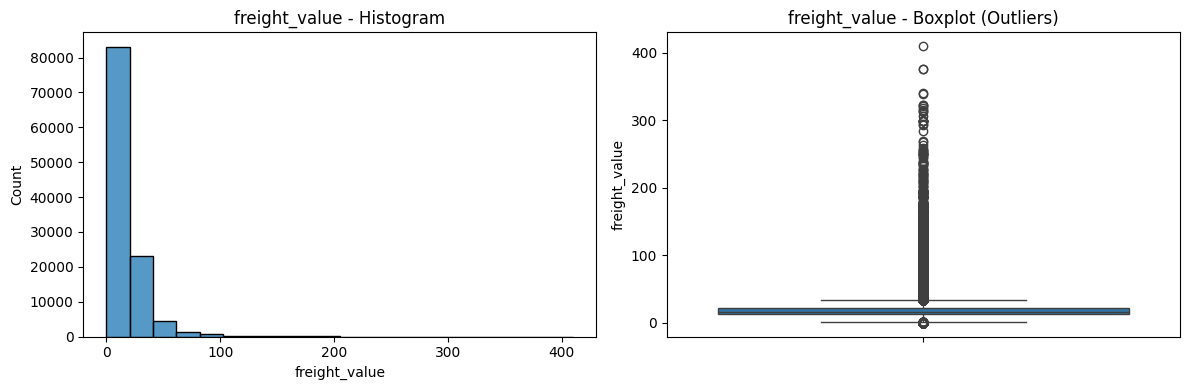

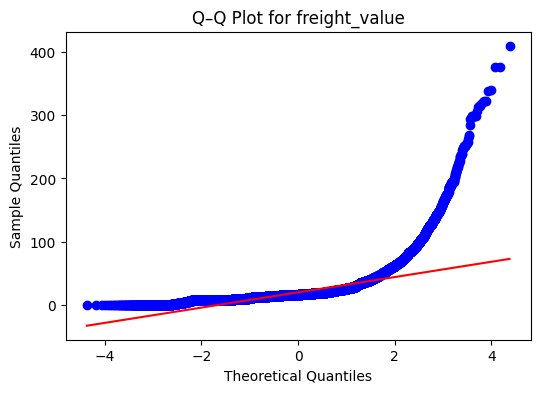

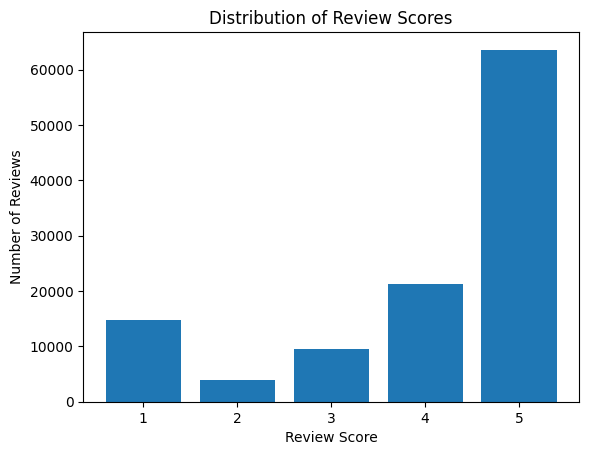

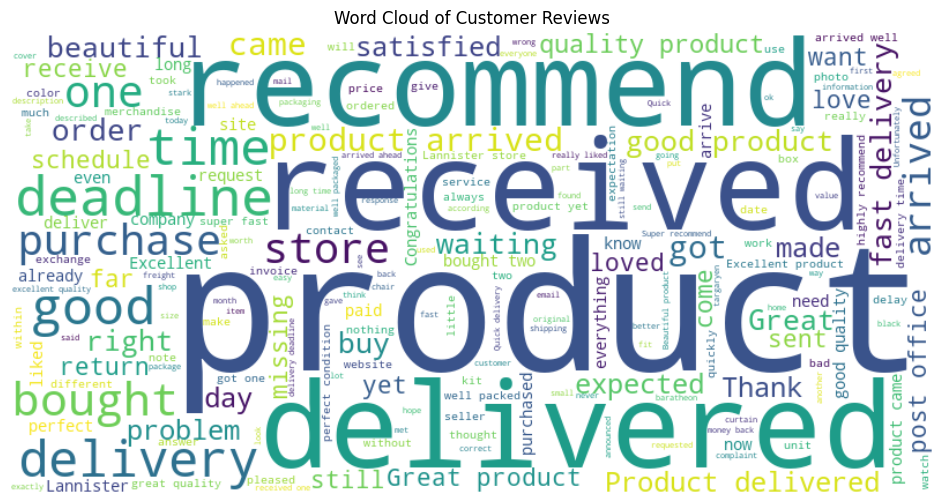

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import scipy.stats as stats
#Univariate GEDA

numerical_attributes = ['price', 'freight_value']
categorical_attributes = ['product_category', 'customer_state']

#Bar charts for categorical attributes
for att in categorical_attributes:
    df[att].value_counts().head(8).plot.bar(figsize=(10, 5), title=f'{att} Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
#Plots confirm our observation in the above cell but we see also that health beauty category can also have trendy products because it is almost close
#to bed bath table category.

for att in numerical_attributes:
    n = pd.to_numeric(df[att],errors='coerce').dropna()
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram
    sns.histplot(n, bins=20, ax=axes[0]) #I have used 20 bins to show the clear distribution of the attributes and to see the skewness in a clear way 
                                         #as most of them are skewed.
    axes[0].set_title(f"{att} - Histogram")
    
    # Boxplot
    sns.boxplot(y=n, ax=axes[1])
    axes[1].set_title(f"{att} - Boxplot (Outliers)")
    
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    stats.probplot(n, dist="norm", plot=plt)
    plt.title(f"Q–Q Plot for {att}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.show()

#We can clearly see outliers in the numerical attributes.
#Q-Q plot was added to see the skewness clearly.

#Review score distribution
score_counts = df['review_score'].value_counts().sort_index()

plt.bar(score_counts.index, score_counts.values)
plt.xlabel("Review Score")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Scores")
plt.show()
#We can see that most of the customer are satisfied with their purchases, then the company already achieves good profit.

#Combine all review texts
text = " ".join(str(comment) for comment in df['review_comment_message'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Customer Reviews")
plt.show()

#Most of the reviews are good reviews and it is about order state.

In [8]:
print("Missing Value:")
missing_data = df.isnull().sum().sort_values(ascending=False)
# Display only columns with missing values
print(missing_data[missing_data > 0])
#A lot of missing values that need to be imputed.

Missing Value:
review_comment_message     65964
product_category            2414
product_photos_qty          2390
review_answer_timestamp      961
review_creation_date         961
review_score                 961
product_width_cm             796
product_height_cm            796
product_length_cm            796
product_weight_g             796
seller_state                 778
seller_city                  778
freight_value                778
price                        778
shipping_limit_date          778
seller_id                    778
product_id                   778
order_item_id                778
dtype: int64


In [10]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
start_date = df['order_purchase_timestamp'].min()
end_date = df['order_purchase_timestamp'].max()
print(f"Dataset Time Span: {start_date.date()} to {end_date.date()}")
print(f"Total Duration for V_long (Historical) Calculation: {(end_date - start_date).days} days")
#Needed next for calculating the purchasing speedup index to identify trends.

Dataset Time Span: 2016-09-04 to 2018-10-17
Total Duration for V_long (Historical) Calculation: 772 days


# 2. Preprocessing

In [13]:
import re 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Handling missing values
#For dates remove empty raws
df = df.dropna(subset=['order_purchase_timestamp'])
df = df.dropna(subset=['review_creation_date'])

df = df.dropna(subset=['product_id'])

#For messages we filled them with no comment
df['review_comment_message'] = df['review_comment_message'].fillna('')

#For numerical variables impute them with median as it is more robust.
if df['price'].isnull().any():
    median = df['price'].median()
    df['price'] = df['price'].fillna(median)
    
if df['freight_value'].isnull().any():
    median = df['freight_value'].median()
    df['freight_value'] = df['freight_value'].fillna(median)
    
if df['review_score'].isnull().any():
    median = df['review_score'].median()
    df['review_score'] = df['review_score'].fillna(median)

#For categorical variables impute them with mode
mode = df['customer_state'].mode().iloc[0]
df['customer_state'] = df['customer_state'].fillna(mode)

mode = df['product_category'].mode().iloc[0]
df['product_category'] = df['product_category'].fillna(mode)
    
#Handling Outliers by using log transformation
df['price_log'] = np.log1p(df['price'])

df['freight_value_log'] = np.log1p(df['freight_value'])

#Preprocessing review_messages

normalized_text = []     # to store cleaned text
tokens_list = []          # to store tokens 

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Loop through each tweet in the dataset
for text in df['review_comment_message']:
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) #Remove punctuation ans special characters using regular expressions.
    tokens = word_tokenize(text) #Tokenize the text, keep only meaningful words to make them ready for analysis.
    filtered_tokens = [word for word in tokens if word not in stop_words] #remove stop words in the tokens.
    cleaned_text = ' '.join(filtered_tokens) #put a space between each token and join them.
    normalized_text.append(cleaned_text) #The normalized version of the tweets.
    tokens_list.append(filtered_tokens) #Keep the list of the tokens if needed in feature extraction.


# Add the results as new columns
df['normalized_text'] = normalized_text
df['tokens'] = tokens_list


df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,...,seller_city,seller_state,review_score,review_comment_message,review_creation_date,review_answer_timestamp,price_log,freight_value_log,normalized_text,tokens
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,...,maua,SP,4.0,"I haven't tested the product yet, but it arriv...",2017-10-11,2017-10-12 03:43:48,3.433665,2.274186,havent tested product yet arrived correct good...,"[havent, tested, product, yet, arrived, correc..."
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,...,belo horizonte,SP,4.0,Very good product.,2018-08-08,2018-08-08 18:37:50,4.784989,3.168003,good product,"[good, product]"
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,...,guariba,SP,5.0,,2018-08-18,2018-08-22 19:07:58,5.080783,3.006672,,[]
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,belo horizonte,MG,5.0,I was sad that you didn't answer me.,2017-12-03,2017-12-05 19:21:58,3.828641,3.339322,sad didnt answer,"[sad, didnt, answer]"
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,mogi das cruzes,SP,5.0,,2018-02-17,2018-02-18 13:02:51,3.039749,2.274186,,[]


In [15]:
!pip install feature-engine
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# 3. Feature Engineering

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import EqualFrequencyDiscretiser
import pandas as pd
import numpy as np
from datetime import timedelta

#Initialize the main DataFrame X, which will hold the final features.
X = df[['customer_id', 'product_id', 'order_id', 'order_purchase_timestamp', 'review_creation_date', 'customer_state', 'review_score', 'price_log', 'freight_value_log', 'product_category', 'normalized_text']].copy()

# Set the current time reference (Max order time in the dataset)
current_time = df['order_purchase_timestamp'].max()

#Derived Features

#Customer Behavioral Features (F_C) Aggregation (per customer_id)#order_count (How often does the customer buy?)
customer_counts = X.groupby('customer_id')['order_id'].nunique().reset_index(name='order_count')

#avg_spend (How much does the customer spend?)
customer_spending = X.groupby('customer_id')['price_log'].mean().reset_index(name='avg_spend')

#avg_review_score (How much the customers are satisfied with their bought products on average)
customer_review = X.groupby('customer_id')['review_score'].mean().reset_index(name='avg_review_score')

#prefered_category
#Count distinct orders per customer per category
category_counts = X.groupby(['customer_id', 'product_category'])['order_id'].nunique().reset_index(name='category_count')
#Find the max order count for the customer
category_counts['max_count'] = category_counts.groupby('customer_id')['category_count'].transform('max')
#Filter raws with only max ordered categories for each customer
preferred = category_counts[category_counts['category_count'] == category_counts['max_count']]
#Take the first one in case of having two categories that have the same count
preferred_category_final = preferred.drop_duplicates(subset=['customer_id'], keep='first')
preferred_category_final = preferred_category_final[['customer_id', 'product_category']].rename(columns={'product_category': 'prefered_category'})

#Merge all F_C features into a single dataframe (F_C aggregation)
F_C_agg = customer_counts.merge(customer_spending, on='customer_id', how='left')
F_C_agg = F_C_agg.merge(customer_review, on='customer_id', how='left')
F_C_agg = F_C_agg.merge(preferred_category_final[['customer_id', 'prefered_category']], on='customer_id', how='left')
# Also merge the customer state as it's a customer attribute
F_C_agg = F_C_agg.merge(X[['customer_id', 'customer_state']].drop_duplicates(), on='customer_id', how='left')
F_C_agg = F_C_agg.drop_duplicates(subset=['customer_id'])


#Product Descriptive Features (F_P) Aggregation (per product_id)#historical_sales_count (How much the company sell from each product)
product_sales_count = X.groupby('product_id')['order_id'].count().reset_index(name='historical_sales_count')

#product_price_level 
#Split the data (80% train, 20% test) to do frequency-bining encoding
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
#The variable we want to discretize
TARGET_NUMERIC_FEATURES = ['price_log']
#Create the equal-frequency binning transformer
#q=3 which represents Budget, Mid, Premium
disc = EqualFrequencyDiscretiser(q=3, variables=TARGET_NUMERIC_FEATURES)
# Fit on training data to avoid data leakage
disc.fit(X_train)
#Transform the entire matrix X
# We transform into a temporary column to avoid overwriting price_log
X_temp = disc.transform(X.copy())
X['product_price_level_bin'] = X_temp['price_log']
#Map bin numbers to labels
label_map = { 0: 'Budget', 1: 'Mid_Range', 2: 'Premium'}
X['product_price_level'] = X['product_price_level_bin'].map(label_map)

# Aggregate this back to the product level by taking the mode to avoid having same products that have different prices
def mode_or_first(s):
    m = s.mode()
    return m.iat[0] if len(m) > 0 else np.nan

product_price_level = X.groupby('product_id')['product_price_level'].agg(mode_or_first).reset_index(name='product_price_level')
F_P_agg = product_sales_count.merge(product_price_level, on='product_id', how='left')
F_P_agg = F_P_agg.drop_duplicates(subset=['product_id'])


#Contextual and Relational Features (F_CR) 

#help us defining the recent period for trend analysis easily
time_window = timedelta(days=30)

#Freight Value Ratio (R_FV) 
#A feature that captures the customer's reaction for delivery costs
# Avoid division by zero or NaN
X['R_FV'] = np.where((X['price_log'].isna()) | (X['price_log'] == 0), 0.0, X['freight_value_log'] / X['price_log'])
# Aggregate R_FV to the product level (average ratio)
product_rfv = X.groupby('product_id')['R_FV'].mean().reset_index(name='R_FV')

#Purchasing Speed Index (I_PS) 
#A feature that explain whether the product popularity increasing or decreasing compared to its sales history


#For every unique product filter the orders that contain that specific product
#Long-Term Velocity (V_long) (product average daily sales from the begining to the end time in the data set)
prod_min_time = df.groupby('product_id')['order_purchase_timestamp'].min().rename('min_time')
prod_count_total = df.groupby('product_id')['order_id'].count().rename('count_total')
prod_long_days = ((current_time - prod_min_time).dt.days + 1).replace(0, 1)  # +1 to avoid zero division

V_long = (prod_count_total / prod_long_days).rename('V_long')

#Short-Term Velocity (V_short) (product average daily sales rate over the recent 30-day window.)
short_term_start = current_time - time_window
recent_mask = df['order_purchase_timestamp'] >= short_term_start
recent = df[recent_mask]

prod_count_recent = recent.groupby('product_id')['order_id'].count().rename('count_recent')
V_short = (prod_count_recent / time_window.days).rename('V_short')

#Combine into one DataFrame and compute I_PS
product_velocity = pd.concat([V_long, V_short], axis=1).fillna(0)
#If V_long is zero, set I_PS to 0 to avoid division by zero
product_velocity['I_PS'] = np.where(product_velocity['V_long'] == 0, 0.0, product_velocity['V_short'] / product_velocity['V_long'])
product_ips = product_velocity['I_PS'].reset_index().rename(columns={'I_PS': 'I_PS'})

#Recent Review Sentiment (S_30) 
#A feature that helps getting product sentiment in the last 30 days
#Do sentiment analysis to get the score of each review positive, negative or nuteral to help identifying trendy products.
sia = SentimentIntensityAnalyzer()

# Vectorized sentiment computation (apply once)
X['sentiment_score'] = X['normalized_text'].fillna("").apply(lambda t: sia.polarity_scores(t)['compound'] if t != "" else 0.0)

# Compute average sentiment in the recent window per product
recent_reviews_mask = X['review_creation_date'] >= short_term_start
recent_reviews = X[recent_reviews_mask]
product_s30 = recent_reviews.groupby('product_id')['sentiment_score'].mean().reset_index(name='S_30')

# For products with no recent reviews, ensure they appear in the final table with S_30 = 0.0
all_products = pd.DataFrame({'product_id': X['product_id'].unique()})
product_s30 = all_products.merge(product_s30, on='product_id', how='left').fillna({'S_30': 0.0})


# Merge all Product-Feature Aggregates
# Use concat over multiple small merges where possible to reduce overhead
# First ensure product_ips, product_rfv, product_s30 are dataframes indexed by product_id
product_ips_df = product_ips.set_index('product_id')
product_rfv_df = product_rfv.set_index('product_id')
product_s30_df = product_s30.set_index('product_id')
product_price_level_df = product_price_level.set_index('product_id')
product_sales_count_df = product_sales_count.set_index('product_id')

# Concatenate horizontally to form F_P_agg_fast
F_P_components = pd.concat([product_sales_count_df, product_price_level_df, product_rfv_df, product_ips_df, product_s30_df], axis=1).reset_index()

# Some columns may have different names (product_price_level was a series). Ensure column names are correct
F_P_agg = F_P_components.rename(columns={'product_price_level': 'product_price_level'}).drop_duplicates(subset=['product_id'])


#Merging all features together
#Get the transactional context for product features
transaction_product_map = X[['customer_id', 'product_id']].drop_duplicates()

# Merge customer features and product features into a transactional table
# Merge F_C_agg (customer-level) with transaction_product_map and then add product aggregations
X_final = transaction_product_map.merge(F_C_agg, on='customer_id', how='left')
X_final = X_final.merge(F_P_agg, on='product_id', how='left') #Final Aggregation to Customer Level (1 row per customer)

#We aggregate the product-level features (F_P, F_CR) by taking the mean or mode
#of all products that customer has purchased.
X_final_agg = X_final.groupby('customer_id').agg(order_count=('order_count', 'first'), avg_spend=('avg_spend', 'first'),
avg_review_score=('avg_review_score', 'first'), prefered_category=('prefered_category', 'first'), customer_state=('customer_state', 'first'),
historical_sales_count=('historical_sales_count', 'mean'), product_price_level =('product_price_level', lambda x: mode_or_first(x) 
if x.notna().any() else np.nan), R_FV=('R_FV', 'mean'), I_PS=('I_PS', 'mean'), S_30=('S_30', 'mean')).reset_index()

X_final_agg = X_final_agg.rename(columns={'customer_id': 'Customer_ID_Key'})

#Features that will be used in clustering
final_features = ['order_count', 'avg_spend', 'avg_review_score', 'historical_sales_count', 'R_FV', 'I_PS', 'S_30']


In [39]:
X_final_agg.head()

,Customer_ID_Key,order_count,avg_spend,avg_review_score,prefered_category,customer_state,historical_sales_count,product_price_level,R_FV,I_PS,S_30
0,00012a2ce6f8dcda20d059ce98491703,1,4.508659,1.0,toys,SP,17.0,Mid_Range,0.731903,0.896078,0.0
1,000161a058600d5901f007fab4c27140,1,4.023564,4.0,health_beauty,MG,1.0,Mid_Range,0.647046,0.000000,0.0
2,0001fd6190edaaf884bcaf3d49edf079,1,5.198442,5.0,baby,ES,1.0,Premium,0.538452,0.000000,0.0
3,0002414f95344307404f0ace7a26f1d5,1,5.016617,5.0,cool_stuff,MG,1.0,Premium,0.680954,0.000000,0.0
4,000379cdec625522490c315e70c7a9fb,1,4.543295,4.0,bed_bath_table,SP,12.0,Mid_Range,0.626520,0.736111,0.0


# 4. Scaling and Encoding

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_att = ['order_count','avg_spend','avg_review_score','historical_sales_count','R_FV','I_PS','S_30']
cat_att = ['prefered_category','customer_state','product_price_level']

#Numerical scaler
num_transformer = StandardScaler()

#Categorical encoder
cat_transformer = OneHotEncoder(sparse_output=False, drop='first')  # drop first to avoid dummy variable 

#Column transformer
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_att),('cat', cat_transformer, cat_att)])

#Apply preprocessing
X_processed = preprocessor.fit_transform(X_final_agg)

#Get categorical feature names
encoded_cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_att)

#Combine numerical + categorical column names
all_columns = num_att + list(encoded_cat_cols)

#Convert to dataFrame
X_final_agg_scaled = pd.DataFrame(X_processed, columns=all_columns)

#Add Customer_ID_Key back
X_final_agg_scaled['Customer_ID_Key'] = X_final_agg['Customer_ID_Key'].values

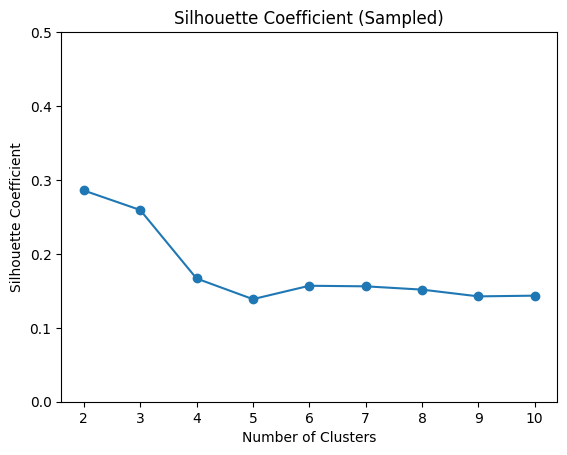

In [23]:
#Applying K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Remove customer ID
X_cluster = X_final_agg_scaled.drop(columns=['Customer_ID_Key'])

#Choose a subset of the data set because it is too slow when applied on the whole data set
sample_size = 5000 if len(X_cluster) > 5000 else len(X_cluster)
X_sample = X_cluster.sample(n=sample_size, random_state=42)

K_range = range(2, 11)
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_sample)
    silhouette_avg = silhouette_score(X_sample, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient (Sampled)')
plt.xlabel('Number of Clusters')
plt.ylim(0, 0.5) # Modify based on data
plt.ylabel('Silhouette Coefficient')
plt.xticks(K_range)
plt.show()

#It is giving that 2 is the best K value but based on domain knowledge it does not make sense that all the customers are grouped into 2 groups only
#so we are going to try clustering using K values 2, 3, 4

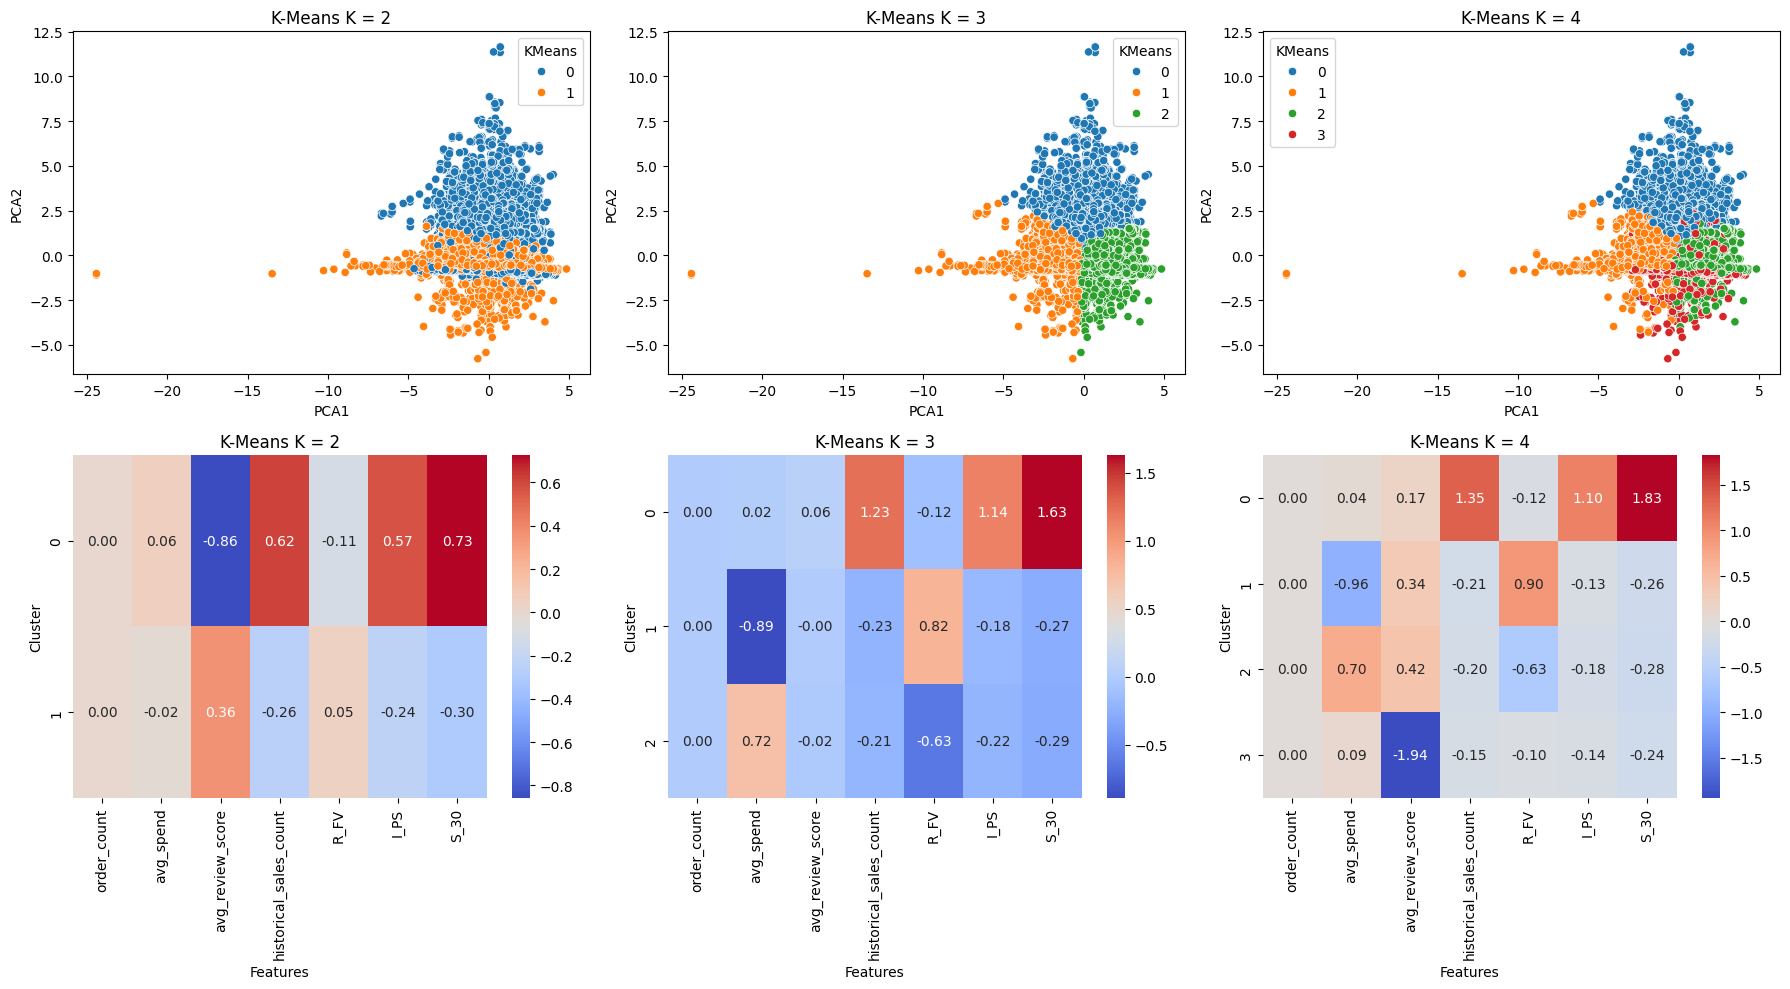

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

#K = 2
model = KMeans(n_clusters=2, random_state=42, n_init='auto')
cluster_labels = model.fit_predict(X_cluster)

#Visualize using PCA in 2D
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_cluster)
clustered_data = X_final_agg_scaled.copy()
clustered_data['KMeans'] = cluster_labels
clustered_data['PCA1'] = X_2d[:,0]
clustered_data['PCA2'] = X_2d[:,1]

fig, axes = plt.subplots(2, 3, figsize=(18,10))  
#Visalizing using 2D PCA 
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans', data=clustered_data, palette='tab10', ax=axes[0,0])
axes[0,0].set_title('K-Means K = 2')

#K = 3
model = KMeans(n_clusters=3, random_state=42, n_init='auto')
cluster_labels = model.fit_predict(X_cluster)
clustered_data['KMeans'] = cluster_labels
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans', data=clustered_data, palette='tab10', ax=axes[0,1])
axes[0,1].set_title('K-Means K = 3')

#K = 4
model = KMeans(n_clusters=4, random_state=42, n_init='auto')
cluster_labels = model.fit_predict(X_cluster)
clustered_data['KMeans'] = cluster_labels
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans', data=clustered_data, palette='tab10', ax=axes[0,2])
axes[0,2].set_title('K-Means K = 4')

#Visualizing using Heatmaps
label_col = 'KMeans'
feature_cols = ['order_count','avg_spend','avg_review_score','historical_sales_count','R_FV','I_PS','S_30']

# Heatmap K = 2
model = KMeans(n_clusters=2, random_state=42, n_init='auto')
clustered_data['KMeans'] = model.fit_predict(X_cluster)
cluster_means = clustered_data.groupby(label_col)[feature_cols].mean()
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1,0])
axes[1,0].set_title('K-Means K = 2')
axes[1,0].set_xlabel("Features")
axes[1,0].set_ylabel("Cluster")

# Heatmap K = 3
model = KMeans(n_clusters=3, random_state=42, n_init='auto')
clustered_data['KMeans'] = model.fit_predict(X_cluster)
cluster_means = clustered_data.groupby(label_col)[feature_cols].mean()
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1,1])
axes[1,1].set_title('K-Means K = 3')
axes[1,1].set_xlabel("Features")
axes[1,1].set_ylabel("Cluster")

# Heatmap K = 4
model = KMeans(n_clusters=4, random_state=42, n_init='auto')
clustered_data['KMeans'] = model.fit_predict(X_cluster)
cluster_means = clustered_data.groupby(label_col)[feature_cols].mean()
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1,2])
axes[1,2].set_title('K-Means K = 4')
axes[1,2].set_xlabel("Features")
axes[1,2].set_ylabel("Cluster")

plt.tight_layout()
plt.show()






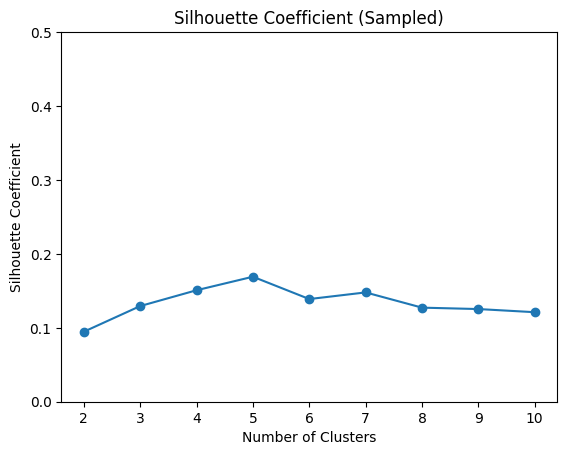

In [29]:
#Applying Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Remove customer ID
X_cluster = X_final_agg_scaled.drop(columns=['Customer_ID_Key'])

#Choose a subset of the data set because it is too slow when applied on the whole data set
sample_size = 5000 if len(X_cluster) > 5000 else len(X_cluster)
X_sample = X_cluster.sample(n=sample_size, random_state=42)

K_range = range(2, 11)
silhouette_scores = []

for k in K_range:
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = agg.fit_predict(X_sample)
    silhouette_avg = silhouette_score(X_sample, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient (Sampled)')
plt.xlabel('Number of Clusters')
plt.ylim(0, 0.5) # Modify based on data
plt.ylabel('Silhouette Coefficient')
plt.xticks(K_range)
plt.show()

#It seems that 5 is the best value of K but we are also going to try 4, 5, 6

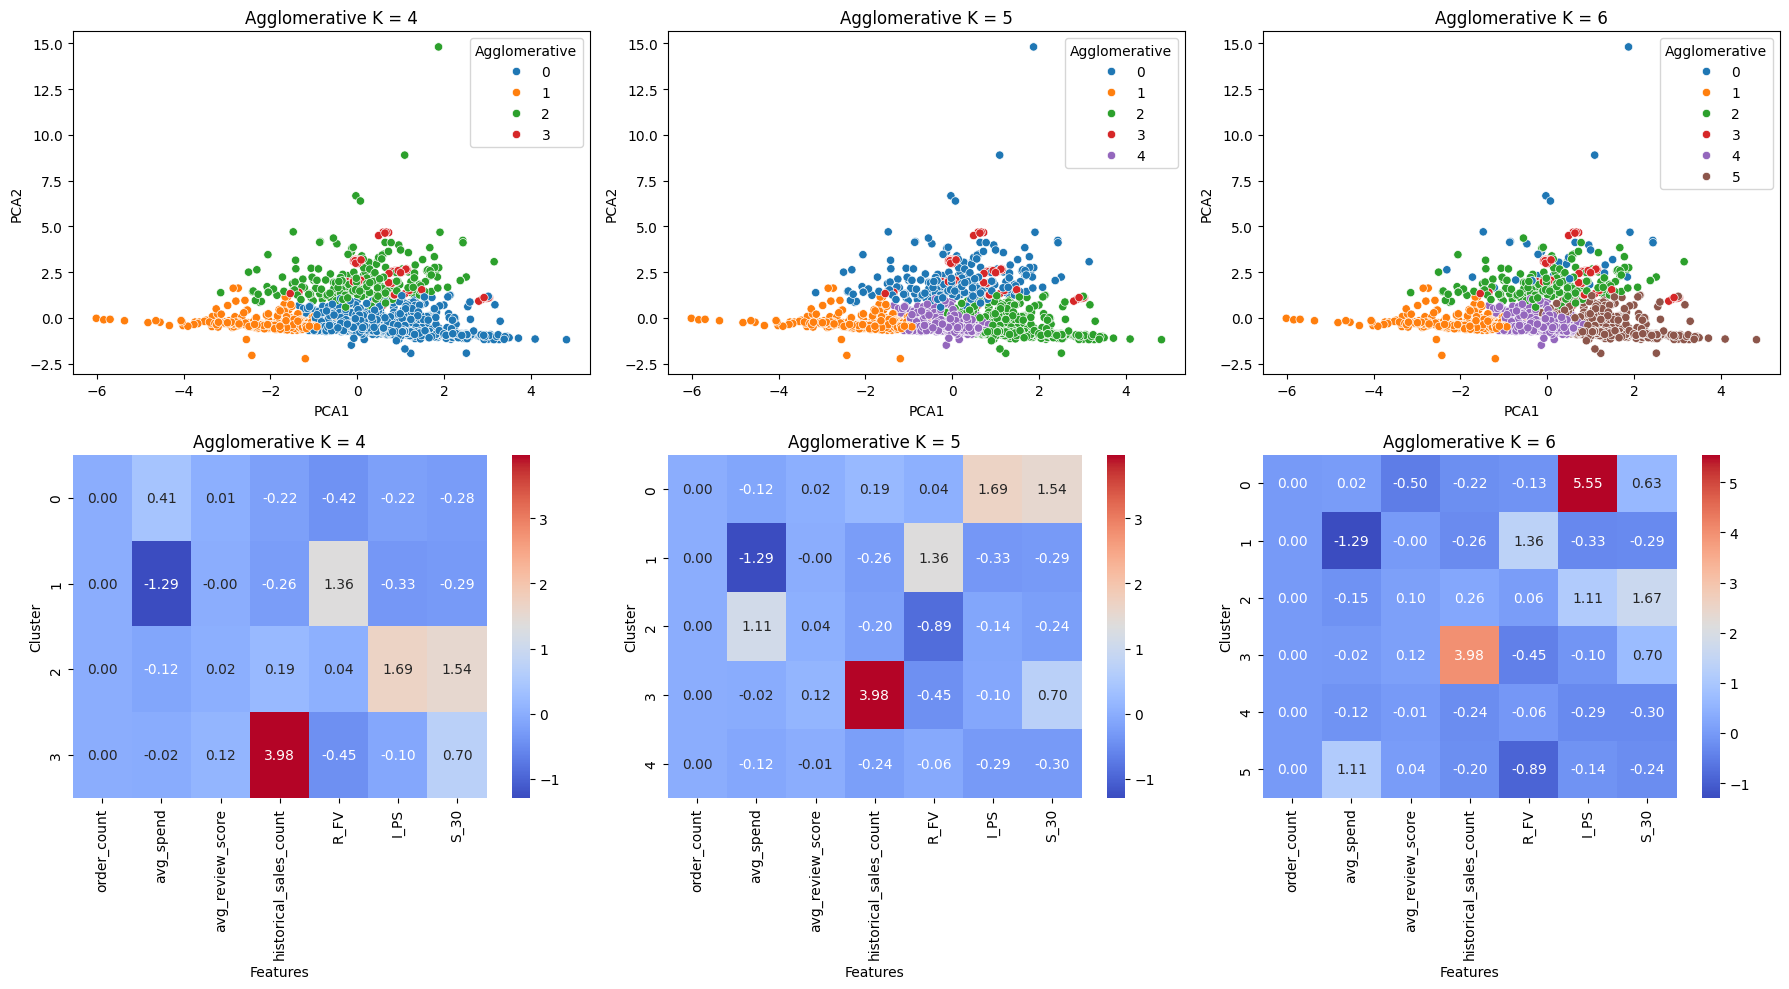

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

#Take a random subset (2000 customers) for faster computation
X_sampled = X_cluster.sample(n=2000, random_state=42)
clustered_data = X_final_agg_scaled.loc[X_sampled.index].copy()

fig, axes = plt.subplots(2, 3, figsize=(18,10))  
pca = PCA(n_components=3)  # reduce to 3 agglomerative clustering as it can't handle high dimensionality
X_pca = pca.fit_transform(X_sampled)

#K = 4
model = AgglomerativeClustering(n_clusters=4)
cluster_labels = model.fit_predict(X_pca)
clustered_data['Agglomerative'] = cluster_labels

#Visualize using PCA in 2D
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_pca)
clustered_data['PCA1'] = X_2d[:,0]
clustered_data['PCA2'] = X_2d[:,1]
sns.scatterplot(x='PCA1', y='PCA2', hue='Agglomerative', data=clustered_data, palette='tab10', ax=axes[0,0])
axes[0,0].set_title('Agglomerative K = 4')

#K = 5
model = AgglomerativeClustering(n_clusters=5)
clustered_data['Agglomerative'] = model.fit_predict(X_pca)
sns.scatterplot(x='PCA1', y='PCA2', hue='Agglomerative', data=clustered_data, palette='tab10', ax=axes[0,1])
axes[0,1].set_title('Agglomerative K = 5')

#K = 6
model = AgglomerativeClustering(n_clusters=6)
clustered_data['Agglomerative'] = model.fit_predict(X_pca)
sns.scatterplot(x='PCA1', y='PCA2', hue='Agglomerative', data=clustered_data, palette='tab10', ax=axes[0,2])
axes[0,2].set_title('Agglomerative K = 6')

#Visualizing using Heatmaps
label_col = 'Agglomerative'
feature_cols = ['order_count','avg_spend','avg_review_score','historical_sales_count','R_FV','I_PS','S_30']

# Heatmap K = 4
model = AgglomerativeClustering(n_clusters=4)
clustered_data['Agglomerative'] = model.fit_predict(X_pca)
cluster_means = clustered_data.groupby(label_col)[feature_cols].mean()
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1,0])
axes[1,0].set_title('Agglomerative K = 4')
axes[1,0].set_xlabel("Features")
axes[1,0].set_ylabel("Cluster")

# Heatmap K = 5
model = AgglomerativeClustering(n_clusters=5)
clustered_data['Agglomerative'] = model.fit_predict(X_pca)
cluster_means = clustered_data.groupby(label_col)[feature_cols].mean()
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1,1])
axes[1,1].set_title('Agglomerative K = 5')
axes[1,1].set_xlabel("Features")
axes[1,1].set_ylabel("Cluster")

# Heatmap K = 6
model = AgglomerativeClustering(n_clusters=6)
clustered_data['Agglomerative'] = model.fit_predict(X_pca)
cluster_means = clustered_data.groupby(label_col)[feature_cols].mean()
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1,2])
axes[1,2].set_title('Agglomerative K = 6')
axes[1,2].set_xlabel("Features")
axes[1,2].set_ylabel("Cluster")

plt.tight_layout()
plt.show()


In [35]:
import matplotlib
import seaborn as sns

print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)


Matplotlib version: 3.10.6
Seaborn version: 0.13.2
